In [133]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

import kagglehub
path = kagglehub.dataset_download("lukebarousse/data-analyst-job-postings-google-search")
print("Path to dataset files:", path)

import os
files = os.listdir(path)
print("Files in dataset directory:", files)

Path to dataset files: /Users/roberttasker/.cache/kagglehub/datasets/lukebarousse/data-analyst-job-postings-google-search/versions/622
Files in dataset directory: ['gsearch_jobs.csv']


In [135]:
import pandas as pd

file_path = os.path.join(path, 'gsearch_jobs.csv')  # Replace with the actual filename
df = pd.read_csv(file_path)

df.head(10)

,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,...,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,0,0,Data Analyst,Cisco Meraki,Anywhere,via LinkedIn,"As the leader in cloud-managed IT, Cisco Merak...","['22 hours ago', 'Work from home', 'Full-time'...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['sql', 'aws', 'tableau']"
1,1,1,Entry Level - Business Data Analyst (Remote),Midwest Staffing,Anywhere,via LinkedIn,As a Senior Business Analyst you will contribu...,"['53 minutes ago', 'Work from home', 'Full-tim...",eyJqb2JfdGl0bGUiOiJFbnRyeSBMZXZlbCAtIEJ1c2luZX...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
2,2,2,Data Analyst/Researcher,"Amyx, Inc.",United States,via Indeed,Overview:\n\nAmyx is seeking to hire a Data An...,"['3 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QvUmVzZWFyY2...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['azure', 'excel', 'sql']"
3,3,3,Data analyst/AI expert to help build a website...,Upwork,Anywhere,via Upwork,I am looking for someone to help me build an A...,"['23 hours ago', 'Work from home', 'Contractor']",eyJqb2JfdGl0bGUiOiJEYXRhIGFuYWx5c3QvQUkgZXhwZX...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['excel']
4,4,4,Data Analyst,Bank Street College of Education,United States,via Higher Education Recruitment Consortium (H...,Position Vacancy – Data Analyst to support the...,"['20 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['powerpoint', 'excel']"
5,5,5,Data Analyst,Marathon TS,Anywhere,via LinkedIn,Marathon TS is seeking a Data Analyst to suppo...,"['9 hours ago', '80K–90K a year', 'Work from h...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,80K–90K,a year,85000.0,80000.0,90000.0,NaN,85000.0,85000.0,[]
6,6,6,Sr. Health Data Analyst - Remote,Talentify.io,Anywhere,via LinkedIn,Our work matters. We help people get the medic...,"['11 hours ago', 'Work from home', 'Full-time'...",eyJqb2JfdGl0bGUiOiJTci4gSGVhbHRoIERhdGEgQW5hbH...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['gcp', 'sql', 'sas', 'vba', 'alteryx', 'table..."
7,7,7,Senior Data Analyst,iSeatz,Anywhere,via Jobgether,"This a Full Remote job, the offer is available...","['5 hours ago', 'Work from home', 'Full-time']",eyJqb2JfdGl0bGUiOiJTZW5pb3IgRGF0YSBBbmFseXN0Ii...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['looker', 'postgresql', 'python', 'snowflake'..."
8,8,8,SAP- Data Analyst - Contract to Hire,Upwork,Anywhere,via Upwork,The responsibilities of our Data Analysts incl...,"['10 hours ago', 'Work from home', 'Full-time'...",eyJqb2JfdGl0bGUiOiJTQVAtIERhdGEgQW5hbHlzdCAtIE...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['pyspark', 'azure', 'sap', 'excel', 'sql', 'p..."
9,9,9,LEAD DATA ANALYST,Lumen,"Jefferson City, MO",via Nexxt,About Lumen\n\nLumen is a global technology le...,"['9 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJMRUFEIERBVEEgQU5BTFlTVCIsIm...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['python', 'sql', 'excel', 'power_bi', 'tableau']"


In [151]:
# view data: print(df.loc[2, 'description'])

df.info()

# Let's change some columns to strings
df['title'] = df['title'].fillna('').astype(str)
df['description'] = df['description'].fillna('').astype(str)
df['via'] = df['via'].fillna('').astype(str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54150 entries, 0 to 54149
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           54150 non-null  int64  
 1   index                54150 non-null  int64  
 2   title                54150 non-null  object 
 3   company_name         54150 non-null  object 
 4   location             54113 non-null  object 
 5   via                  54150 non-null  object 
 6   description          54150 non-null  object 
 7   extensions           54150 non-null  object 
 8   job_id               54150 non-null  object 
 9   thumbnail            34063 non-null  object 
 10  posted_at            54114 non-null  object 
 11  schedule_type        53920 non-null  object 
 12  work_from_home       25609 non-null  object 
 13  salary               9280 non-null   object 
 14  search_term          54150 non-null  object 
 15  date_time            54150 non-null 

In [137]:
# Filter out Upwork jobs
filtered_df = df[~df['via'].str.contains('Upwork', case=False, na=False)]

# Filter for jobs containing the desired titles
job_titles = ['Data Analyst', 'Data Scientist', 'Data Analytics']
pattern = '|'.join(job_titles)

filtered_df1 = df[df['title'].str.contains(pattern, case=False, na=False)]


# Filter for remote jobs
filtered_df = filtered_df1[filtered_df1['description'].str.contains('remote', case=False, na=False)]


# List of skills to look for in the job descriptions
target_strings = ['(?:sql|mysql)', 'tableau', 'excel', 'python', 'power bi', ' r ', 'vba', 'snowflake', 'azure', 'sas', 'scala', 'looker']

# Count occurrences
counts = {string: filtered_df['description'].str.contains(string, case=False).sum() for string in target_strings}

# Convert to DataFrame for visualization
counts_df = pd.DataFrame(list(counts.items()), columns=['String', 'Count'])
print(counts_df)

           String  Count
0   (?:sql|mysql)   8851
1         tableau   3992
2           excel   7460
3          python   5165
4        power bi   2632
5              r     872
6             vba    250
7       snowflake    935
8           azure    953
9             sas   1893
10          scala   1147
11         looker    813


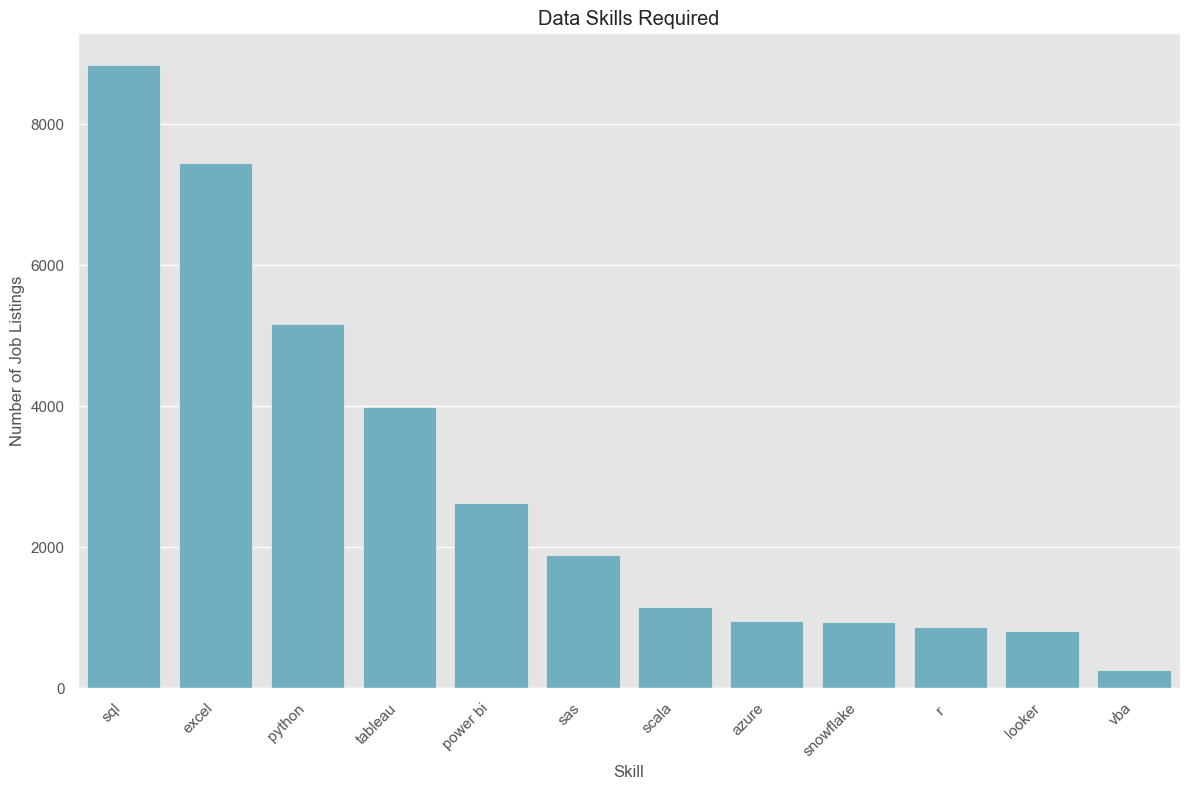

In [138]:
# Rename "(?:sql|mysql)" to "sql"
counts_df.loc[counts_df['String'] == '(?:sql|mysql)', 'String'] = 'sql'

# Sort values in descending order
counts_df = counts_df.sort_values(by='Count', ascending=False)

# Plot with Seaborn
sns.barplot(x='String', y='Count', data=counts_df, color = 'c')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Skill')
plt.ylabel('Number of Job Listings')
plt.title('Data Skills Required')
plt.tight_layout()
plt.show()

0           sql
2         excel
3        python
1       tableau
4      power bi
9           sas
10        scala
8         azure
7     snowflake
5            r 
11       looker
6           vba
Name: String, dtype: object

0     8851
2     7460
3     5165
1     3992
4     2632
9     1893
10    1147
8      953
7      935
5      872
11     813
6      250
Name: Count, dtype: int64


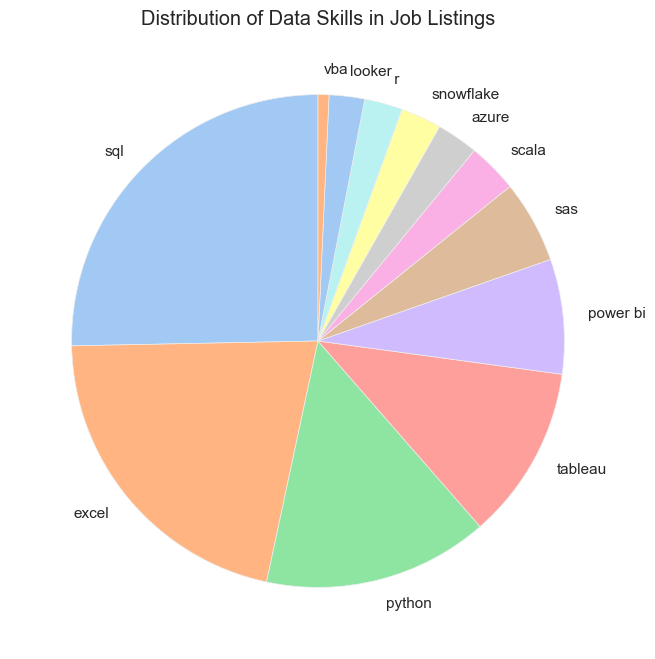

In [139]:
# Use the existing counts_df DataFrame
labels = counts_df['String']
values = counts_df['Count']

print(labels)
print()
print(values)

# Create the pie chart
plt.pie(values, labels=labels, startangle=90, colors=sns.color_palette("pastel", len(labels)))

# Add a title
plt.title('Distribution of Data Skills in Job Listings')

# Display the pie chart
plt.show()

In [140]:
# Calculate total number of filtered job listings
total_jobs = len(filtered_df)
print('Total Job Listings After Filtering: ', total_jobs)
print()

# Calculate percentages
counts_df['Percentage'] = round(((counts_df['Count'] / total_jobs) * 100), 2)

# Sort the DataFrame by percentage
counts_df = counts_df.sort_values(by='Percentage', ascending=False)

# Print the table
print(counts_df)

# Let's save the table to a CSV for future use
counts_df.to_csv('skill_percentages.csv', index=False)

Total Job Listings After Filtering:  13424

       String  Count  Percentage
0         sql   8851       65.93
2       excel   7460       55.57
3      python   5165       38.48
1     tableau   3992       29.74
4    power bi   2632       19.61
9         sas   1893       14.10
10      scala   1147        8.54
8       azure    953        7.10
7   snowflake    935        6.97
5          r     872        6.50
11     looker    813        6.06
6         vba    250        1.86


In [141]:
# Filter rows where the 'Percentage' column is greater than 20%
filtered_percentages = counts_df[counts_df['Percentage'] > 20]

# Display the filtered DataFrame
print(filtered_percentages)

    String  Count  Percentage
0      sql   8851       65.93
2    excel   7460       55.57
3   python   5165       38.48
1  tableau   3992       29.74
